# Beautiful Soup

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
!pip list | grep bs4

bs4                           0.0.1


In [ ]:
# review basic python
list_a = ['toy', 'zue', 'aan']
tuple_a = ['banana', 'apple', 'grape']
dict_a = {'name': 'toy', 'age': 32}

In [ ]:
# https://www.worldometers.info/coronavirus/

In [ ]:
# get content from the url
my_url = "https://www.worldometers.info/coronavirus/"
page = requests.get(my_url)

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple
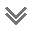

In [ ]:
page.text

In [ ]:
soup = BeautifulSoup(page.text, 'html5lib')

In [ ]:
# id=main_table_countries_today

In [ ]:
# get table header
table_header = soup.select('#main_table_countries_today thead tr')
table_header[0]('th')

[<th width="1%">#</th>,
 <th width="100">Country,<br/>Other</th>,
 <th width="20">Total<br/>Cases</th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Total<br/>Recovered</th>,
 <th width="30">New<br/>Recovered</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Serious,<br/>Critical</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th style="display:none" width="30">Continent</th>,
 <th width="30">1 Case<br/>every X ppl</th>,
 <th width="30">1 Death<br/>every X ppl</th>,
 <th width="30">1 Test<br/>every X ppl</th>,
 <th width="30">New Cases/1M pop</th>,
 <th width="30">New Deaths/1M pop</th>,
 <th width="30">Active Cases/1M pop</th>]

In [ ]:
import re 

header = []

for i in table_header[0]('th'):
    header.append(re.sub(r'[\s,//]', '', i.text.strip()))

print(header)

['#', 'CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests', 'Tests1Mpop', 'Population', 'Continent', '1CaseeveryXppl', '1DeatheveryXppl', '1TesteveryXppl', 'NewCases1Mpop', 'NewDeaths1Mpop', 'ActiveCases1Mpop']


In [ ]:
# list comprehension
header = [re.sub(r'[\s,//]', '', i.text.strip()) for i in table_header[0]('th')]
print(header)

['#', 'CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests', 'Tests1Mpop', 'Population', 'Continent', '1CaseeveryXppl', '1DeatheveryXppl', '1TesteveryXppl', 'NewCases1Mpop', 'NewDeaths1Mpop', 'ActiveCases1Mpop']


In [ ]:
# get table row
table_rows = soup.select("#main_table_countries_today tbody tr")

row_list = []
for tr in table_rows:
    row = []
    for td in tr('td'):
        row.append(td.text.strip())
    row_list.append(row)

print(row_list)

[['', 'North America', '95,194,954', '+10,558', '1,411,619', '+461', '66,716,745', '+11,604', '27,066,590', '13,030', '', '', '', '', '', 'North America', '', '', '', '', '', ''], ['', 'Asia', '119,109,278', '+406,489', '1,355,544', '+1,292', '108,909,192', '+180,066', '8,844,542', '30,944', '', '', '', '', '', 'Asia', '', '', '', '', '', ''], ['', 'South America', '54,498,776', '+466', '1,260,452', '+10', '48,582,675', '+1,126', '4,655,649', '13,193', '', '', '', '', '', 'South America', '', '', '', '', '', ''], ['', 'Europe', '158,529,236', '+175,339', '1,718,542', '+1,238', '137,472,187', '+531,417', '19,338,507', '13,766', '', '', '', '', '', 'Europe', '', '', '', '', '', ''], ['', 'Africa', '11,555,843', '+752', '249,895', '+8', '10,676,313', '+1,468', '629,635', '1,810', '', '', '', '', '', 'Africa', '', '', '', '', '', ''], ['', 'Oceania', '3,756,561', '+47,919', '7,969', '+45', '3,311,433', '+18,772', '437,159', '158', '', '', '', '', '', 'Australia/Oceania', '', '', '', '', ''

In [ ]:
# create dataframe
df = pd.DataFrame(
    row_list, 
    columns = header
)

df.head()

,#,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,...,TotalTests,Tests1Mpop,Population,Continent,1CaseeveryXppl,1DeatheveryXppl,1TesteveryXppl,NewCases1Mpop,NewDeaths1Mpop,ActiveCases1Mpop
0,,North America,"95,194,954","+10,558","1,411,619",+461,"66,716,745","+11,604","27,066,590","13,030",...,,,,North America,,,,,,
1,,Asia,"119,109,278","+406,489","1,355,544","+1,292","108,909,192","+180,066","8,844,542","30,944",...,,,,Asia,,,,,,
2,,South America,"54,498,776",+466,"1,260,452",+10,"48,582,675","+1,126","4,655,649","13,193",...,,,,South America,,,,,,
3,,Europe,"158,529,236","+175,339","1,718,542","+1,238","137,472,187","+531,417","19,338,507","13,766",...,,,,Europe,,,,,,
4,,Africa,"11,555,843",+752,"249,895",+8,"10,676,313","+1,468","629,635","1,810",...,,,,Africa,,,,,,


In [ ]:
# filter Thailand
df.query("CountryOther == 'Thailand'")

,#,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,...,TotalTests,Tests1Mpop,Population,Continent,1CaseeveryXppl,1DeatheveryXppl,1TesteveryXppl,NewCases1Mpop,NewDeaths1Mpop,ActiveCases1Mpop
40,33,Thailand,"2,981,996","+23,834","23,127",+54,"2,731,029","+19,351","227,840",687,...,"17,270,775","246,402","70,091,808",Asia,24,"3,031",4,340,0.8,"3,251"


In [ ]:
df.loc[df["CountryOther"] == 'Thailand']

,#,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,...,TotalTests,Tests1Mpop,Population,Continent,1CaseeveryXppl,1DeatheveryXppl,1TesteveryXppl,NewCases1Mpop,NewDeaths1Mpop,ActiveCases1Mpop
40,33,Thailand,"2,981,996","+23,834","23,127",+54,"2,731,029","+19,351","227,840",687,...,"17,270,775","246,402","70,091,808",Asia,24,"3,031",4,340,0.8,"3,251"


In [ ]:
country = df.query("CountryOther == 'Thailand'").CountryOther.values[0]
newcases = df.query("CountryOther == 'Thailand'").NewCases.values[0]

print(country, newcases)

Thailand +23,834


# Line Notification

In [ ]:
line_token = "xxx"

def line_notify(message, token):
    url = "https://notify-api.line.me/api/notify"
    data = ({'message': message})
    LINE_HEADERS = {'Authorization': 'Bearer ' + token}
    session = requests.Session()
    response = session.post(url, headers = LINE_HEADERS, data = data)
    return response 

In [ ]:
msg = f'{country}: {newcases}'
line_notify(msg, line_token) 

<Response [200]>

In [ ]:
!pip install schedule

In [ ]:
import schedule
import time

schedule.every(10).seconds.do(line_notify, msg, line_token)
# schedule.every().hour.do(line_notify, msg, line_token)
# schedule.every().day.do(line_notify, msg, line_token)
# schedule.every().monday.do(line_notify, msg, line_token)
# schedule.every().wednesday.at('12:00').do(line_notify, msg, line_token)

while True:
    try:
        schedule.run_pending()
        time.sleep(1)
    except:
        schedule.clear()
        break

# Selenium

In [ ]:
!pip install selenium

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin/
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd 
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
driver = webdriver.Chrome('chromedriver', chrome_options = options)

In [ ]:
# https://shopee.co.th/

In [ ]:
url = "https://shopee.co.th/"
driver.get(url)

In [ ]:
driver.page_source

In [ ]:
# search watch and enter (keyboard)
driver.find_element_by_class_name('shopee-searchbar-input__input').send_keys('watch' + Keys.ENTER)

In [ ]:
# get product names
list_products = driver.find_elements_by_class_name('PFM7lj')
print(list_products[3].text)

In [ ]:
list_products_text = []

for item in list_products:
    list_products_text.append(item.text)

list_products_text

In [ ]:
# get price
list_prices = list_products = driver.find_elements_by_class_name('_29R_un')


In [ ]:
list_prices_text = []

for item in list_prices:
    list_prices_text.append(item.text)

list_prices_text

In [ ]:
# combine a dataframe
shopee_df = pd.DataFrame(
    zip(list_products_text, list_prices_text), columns = ['products', 'prices']
)

shopee_df

In [ ]:
# write csv file
df.to_csv('shopee_watch.csv')